In [116]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
ExpMat = pd.read_csv("dat/Jon_data/energy-exp_level.csv", index_col="ROW")
ExpMat2, ExpZscoreMat2, ExpMatNorm2, ExpZscoreMatNorm2 = LoadExpressionMatrices(
                        ExpMat = "../dat/allen-mouse-exp/new-energy-conn-model.csv", 
                        ExpZscoreMat = "../dat/allen-mouse-exp/new-energy-conn-zscore.csv",
                        ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv",
                        ExpZscoreMatNorm = "../dat/allen-mouse-exp/energy-zscore-neuronorm.csv")
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Control Data

## 1.1 Sibling Subsampled

# 2. Long & Short Connection

In [17]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
g = LoadConnectome2(ConnFil=
                    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv")
EdgeWeightsDict = EdgeDict(g, keyon="label")
adj_mat = pd.read_csv(
    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv",
    index_col="ROW")

In [10]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
ins = MostCohesiveCirtuis(Init_States, g, candidates, EdgeWeightsDict)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:993: RuntimeWarning: divide by zero encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out


0.5355748265814344


In [11]:
InCirtuitNodes = ins.CandidateNodes[np.where(state==1)[0]]
print(len(InCirtuitNodes))

34


### 2.1 Exp correlation

In [13]:
Exp_Corr_DF = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                         index_col = "ROW")
Exp_Corr_DF.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
Anterior_amygdalar_area,1.00000,0.85538,0.855530,0.914668,0.808901,0.879144,0.896017,0.861916,0.902554,0.835838,...,0.870985,0.849980,0.866197,0.863410,0.867540,0.887105,0.866147,0.845258,0.880674,0.822443
Anterior_cingulate_area_dorsal_part,0.85538,1.00000,0.967816,0.900520,0.824164,0.850890,0.903118,0.875560,0.908175,0.788785,...,0.916002,0.891939,0.904911,0.869791,0.818651,0.849138,0.842211,0.859613,0.862093,0.813509


In [26]:
list(InCirtuitNodes)

['Dentate_gyrus',
 'Prelimbic_area',
 'Orbital_area_lateral_part',
 'Field_CA1',
 'Infralimbic_area',
 'Dorsal_peduncular_area',
 'Nucleus_accumbens',
 'Field_CA2',
 'Lateral_posterior_nucleus_of_the_thalamus',
 'Orbital_area_ventrolateral_part',
 'Claustrum',
 'Field_CA3',
 'Anterior_olfactory_nucleus',
 'Endopiriform_nucleus_dorsal_part',
 'Subiculum_dorsal_part',
 'Anterior_cingulate_area_dorsal_part',
 'Primary_visual_area',
 'Anteromedial_visual_area',
 'Nucleus_of_reuniens',
 'Accessory_olfactory_bulb',
 'Retrosplenial_area_lateral_agranular_part',
 'Orbital_area_medial_part',
 'Secondary_motor_area',
 'Anterior_cingulate_area_ventral_part',
 'Presubiculum',
 'Agranular_insular_area_ventral_part',
 'Mediodorsal_nucleus_of_thalamus',
 'Lateral_septal_nucleus_caudal_caudodorsal_part',
 'Basolateral_amygdalar_nucleus',
 'Submedial_nucleus_of_the_thalamus',
 'Primary_somatosensory_area_trunk',
 'Posterior_parietal_association_areas',
 'Lateral_visual_area',
 'Taenia_tecta']

### 2.2 Within/Cross Regions

In [45]:
#adj_mat_cir = adj_mat.loc[InCirtuitNodes, InCirtuitNodes]
#str2reg = STR2Region()
#adj_mat_cir 
%time
ALL_STRs = adj_mat.index.values
adj_mat_local = []
adj_mat_distal = []
for str_i in ALL_STRs:
    tmp_local = []
    tmp_distal = []
    for str_j in ALL_STRs:
        weight = adj_mat.loc[str_i, str_j]
        if weight == 0:
            tmp_local.append(0)
            tmp_distal.append(0)
        else:
            rg_i = str2reg[str_i]
            rg_j = str2reg[str_j]
            if rg_i == rg_j:
                tmp_local.append(weight)
                tmp_distal.append(0)
            else:
                tmp_local.append(0)
                tmp_distal.append(weight)
    adj_mat_local.append(tmp_local)
    adj_mat_distal.append(tmp_distal)
adj_mat_local = pd.DataFrame(data=adj_mat_local, index=ALL_STRs, columns=ALL_STRs)
adj_mat_distal = pd.DataFrame(data=adj_mat_distal, index=ALL_STRs, columns=ALL_STRs)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [50]:
###### local co
type("xxx") == str
g_local = LoadConnectome2(ConnFil=adj_mat_local)
g_distal = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local = EdgeDict(g_local, keyon="label")
EdgeWeightsDict_distal = EdgeDict(g_distal, keyon="label")

In [122]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
meta_jon.head(2)


,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.511273,1,95
Prelimbic_area,0.463267,2,95


In [124]:
Candidate = meta_jon.head(50).index.values
np.mean(ScoreSTRSet(g, Candidate, EdgeWeightsDict))

0.36263797442835155

In [126]:
CandidateNodes = meta_jon.head(50).index.values
Init_States = np.ones(len(CandidateNodes))
for idx in range(len(Init_States)):
    if np.random.rand() > 0.5:
        Init_States[idx] = 0
ins = MostCohesiveCirtuis(Init_States, g, CandidateNodes, EdgeWeightsDict, Direction=False, Weighted=False)

In [127]:
ins.copy_strategy = "deepcopy"
ins.Tmax=1
ins.Tmin=0.0001
Tmps, Energys, state, e = ins.anneal()
print("Done")


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00010          0.62     0.00%     0.00%      20000.00     0:01:19     0:00:00

Done


In [128]:
print(1-e, state)
InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]

0.37967599066691526 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [117]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
#del ins
ins = MostCohesiveCirtuis(Init_States, g_local, candidates, EdgeWeightsDict_local)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

0.5062177065637561


In [68]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
ins = MostCohesiveCirtuis(Init_States, g_distal, candidates, EdgeWeightsDict)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

0.28887966996161585


In [129]:
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)
total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict)

In [130]:
print(np.mean(local), np.mean(distal), np.mean(total))

0.4978755850951142 0.28891859917511553 0.37967599066691526


In [121]:
InCirtuitNodes = sim1.columns.values
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)
total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict)
print(np.mean(local), np.mean(distal), np.mean(total))

0.4956158540290119 0.29083948169414986 0.36263797442835155


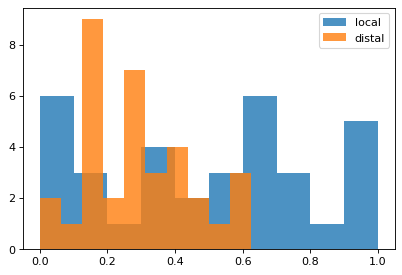

In [74]:
plt.hist(local, label="local", alpha=0.8)
plt.hist(distal, label="distal", alpha=0.8)
plt.legend()
plt.show()

In [75]:

#InCirtuitNodes = df.columns.values[]

In [78]:
df.loc[0,:].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.])

In [104]:
Complete, Local, Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, False, False)
    local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, False, False)
    distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, False, False)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print(np.mean(Complete), np.mean(Local), np.mean(Distal))

0.3188506220012396 0.4150582970240224 0.26957693710191544


In [102]:
Complete, Local, Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, False, False)
    local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, False, False)
    distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, False, False)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))

In [103]:
print(np.mean(Complete), np.mean(Local), np.mean(Distal))

0.36415218426412843 0.47525381440123765 0.2921850958076417


In [99]:
complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, True, True)
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, True, True)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, True, True)
print(complete, local, distal)

ZeroDivisionError: division by zero

In [39]:
def ITR(Internal_In, Total_In, Internal_Out, Total_Out):
    return (Internal_In/Total_In) / (Internal_Out/Total_Out)

In [40]:
ITR(4,6,1,9) # Brodcastor

6.0

In [41]:
ITR(1,6,8,9) # Intergrator

0.1875

### 2.3 Cartesian Ipsilateral distance